In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cmocean as cmo
import matplotlib.colors as colors
import math

#mapping stuff
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

In [2]:
w = pd.read_csv('WCVI_lon_lat.csv', header=0)#, usecols=[0,1,2])
w.head()

,Ref,lon,lat
0,F112,-127.191650,50.017360
1,F169,-124.987033,48.943100
2,F224,-124.992269,48.939677
3,F227,-126.007217,49.307983
4,F233,-125.725490,49.119160


In [3]:
e = pd.read_csv('ECVI_data_processed_MA.csv', header=0)#, usecols=[0,1,2])
e

,Ref,Day,F1078,F1079,F112,F1148,F1158,F1291,F1419,F1472,...,F270,F314,F520,F526,F527,F540,F543,F6668,F7114,F776
0,F1078,0,36000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,F1078,1,36000,426,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,F1078,2,36000,702,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,F1078,3,36000,925,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,F1078,4,36000,1063,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,F776,10,0,0,0,0,0,185,2522,218,...,0,2,196,184,200,773,209,572,1,36000
566,F776,11,0,0,0,1,0,236,2551,259,...,0,2,224,233,232,865,250,617,1,36000
567,F776,12,0,0,0,1,0,296,2581,303,...,0,3,260,266,252,936,298,656,2,36000
568,F776,13,0,0,0,2,0,356,2602,352,...,0,4,281,292,277,999,346,684,2,36000


# Question 1

In [4]:
# first calculate total after 14 days
total14 = [e[(e['Day']==14) & (e['Ref']==e.columns[2:][i])].drop(columns=['Ref','Day']).values.sum()-36000 for i in range(len(e.columns[2:]))]

In [5]:
scale_total = [(t**0.5) * 5 for t in total14]

In [6]:
data = {'lat':w['lat'], 'lon':w['lon'], 'size':scale_total}
d = pd.DataFrame(data)

In [7]:
#sort so that smallest values are layered on top
d = d.sort_values(by=['size'], ascending=False)

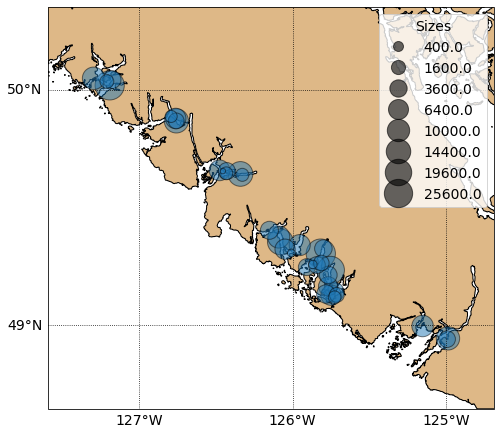

In [8]:
# Increase font size
plt.rcParams['font.size'] = 14

# Make plot area
xlim, ylim = [min(w['lon'])-0.3, max(w['lon'])+0.3], [min(w['lat'])-0.3, max(w['lat'])+0.3]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'),zorder=0)

xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False


scatter = ax.scatter(d['lon'], d['lat'], marker='o', s=d['size'],edgecolors = 'k',transform=crs.PlateCarree(), zorder=1, alpha=0.5)
handles, label1 = scatter.legend_elements(prop="sizes", alpha=0.6)
label2 = [(int(l[-5:-2])/5)**2 for l in label1]
legend = ax.legend(handles, label2, loc="upper right", title="Sizes")

# Question 2: Compare the accumulation of particles over time for 5 locations of your choice!
stacked bar chart? with map inset?<br>
want to one station from each of the "chunks" of stations above

In [8]:
# pick closest to lon = 127.1, 126.8, 126.4, 126.0, and 125
stations = [(w.Ref[np.argmin(np.abs(w.lon+126.8))]),  (w.Ref[np.argmin(np.abs(w.lon+126.4))]),(w.Ref[np.argmin(np.abs(w.lon+126))]),(w.Ref[np.argmin(np.abs(w.lon+125))]),(w.Ref[np.argmin(np.abs(w.lon+127.1))])]
stations

['F1079', 'F1705', 'F227', 'F224', 'F1554']

In [9]:
#hoenstly should have done this in the previous question but lets just add a daily sum column to the pd datafram
e['day_sum'] = e.sum(axis=1) - e['Day'] - 36000

Text(13.5, 3450, '3799')

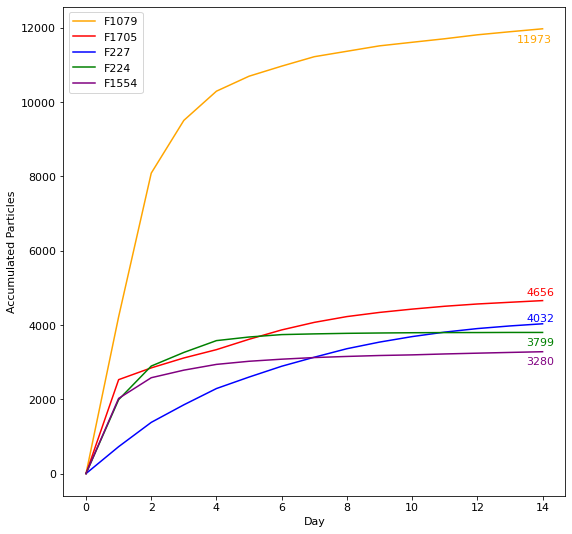

In [36]:
# # first calculate total after 14
fig, ax = plt.subplots(1,1,figsize=(9,9))
c = ['orange', 'r', 'b', 'green', 'purple']

for i in range(len(stations)):
    ax.plot(np.arange(0,15), e[(e['Ref']==stations[i])]['day_sum'], label = stations[i], color = c[i])
ax.set_ylabel('Accumulated Particles')
ax.set_xlabel('Day')
ax.legend()

ax.text(13.5,2950, str(e[(e['Ref']==stations[4]) & (e['Day']==14)]['day_sum'].values[0]), color = c[4])
ax.text(13.2,11600, str(e[(e['Ref']==stations[0]) & (e['Day']==14)]['day_sum'].values[0]), color = c[0])
ax.text(13.5,4800, str(e[(e['Ref']==stations[1]) & (e['Day']==14)]['day_sum'].values[0]), color = c[1])
ax.text(13.5,4100, str(e[(e['Ref']==stations[2]) & (e['Day']==14)]['day_sum'].values[0]), color = c[2])
ax.text(13.5,3450, str(e[(e['Ref']==stations[3]) & (e['Day']==14)]['day_sum'].values[0]), color = c[3])

# Question 3: Convey the number of particles released from each of the 38 farms that reaches each other farm at Day 14

In [10]:
sum(e['F1079'][e['Day']==14])-36000

4032

In [11]:
stations = (e.columns[2:-1])
reach14 = [sum(e[station][e['Day']==14])-36000 for station in stations]

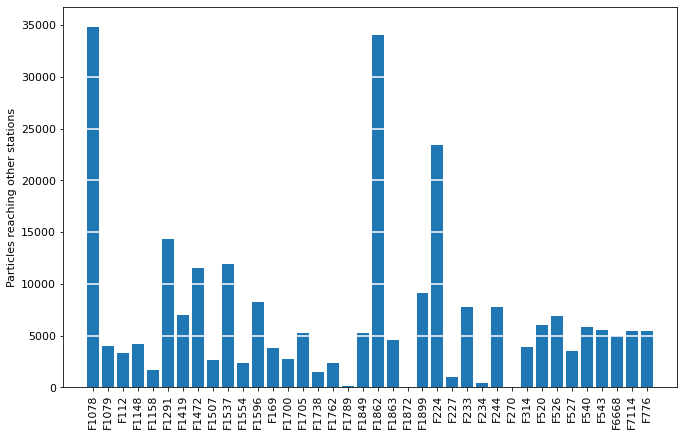

In [40]:
fir, ax = plt.subplots(1,1,figsize=(11,7))
ax.bar(np.arange(0,len(stations)), reach14)
ax.set_xticks(np.arange(0,len(stations)), labels=stations, rotation='vertical')
ax.set_xlim(-2, 39)
ax.set_ylabel('Particles reaching other stations')
for i in np.arange(5000,35001, 5000):
    ax.plot([-2,39], [i,i], color='white')
    
#shoot this doesnt work bc we need destination farm too!

In [41]:
# fir, ax = plt.subplots(1,1,figsize=(11,7))
# bot = np.zeros(len(stations))

# for station in stations:
#     top = e[station][(e['Day']==14)].values
#     top = np.where(top<36000, top, 0)
#     ax.bar(np.arange(0,len(stations)), top, bottom=bot)
#     bot +=top

# ax.set_xticks(np.arange(0,len(stations)), labels=stations, rotation='vertical')
# ax.set_xlim(-2, 39)
# ax.set_ylabel('Particles reaching other stations')
# for i in np.arange(5000,35001, 5000):
#     ax.plot([-2,39], [i,i], color='white')
    
    
# # HORRIBLE!

In [12]:
# lets make a matrix and use p colourmesh
part = np.zeros((38,38))
for i in range(38):
    top = e[stations[i]][(e['Day']==14)].values
    np.where(top>0, top, 1)
    part[i,:] = top

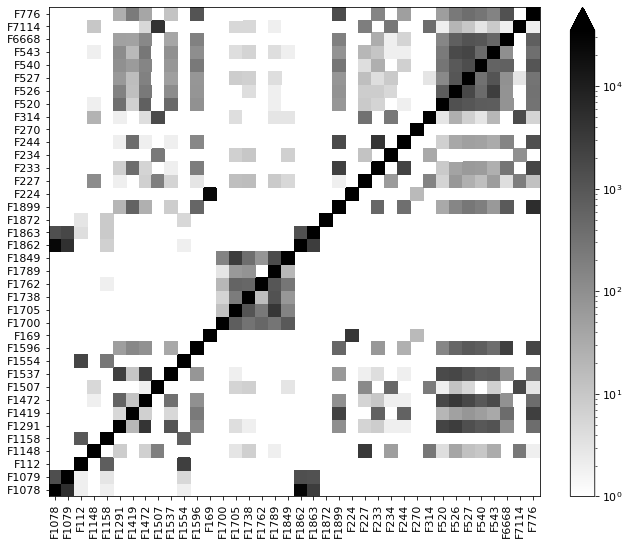

In [13]:
fig, ax = plt.subplots(1,1,figsize=(11,9))
pcm = ax.pcolor(part, cmap='binary',  norm=colors.LogNorm(vmin=1, vmax=35000))
fig.colorbar(pcm, ax=ax, extend='max')
ax.set_xticks(np.arange(0.5,len(stations)+0.5), labels=stations, rotation='vertical')
ax.set_yticks(np.arange(0.5,len(stations)+0.5), labels=stations)

# Question 4:Convey the number of particles released from each of the 38 farms that reaches each other farm at Day 14

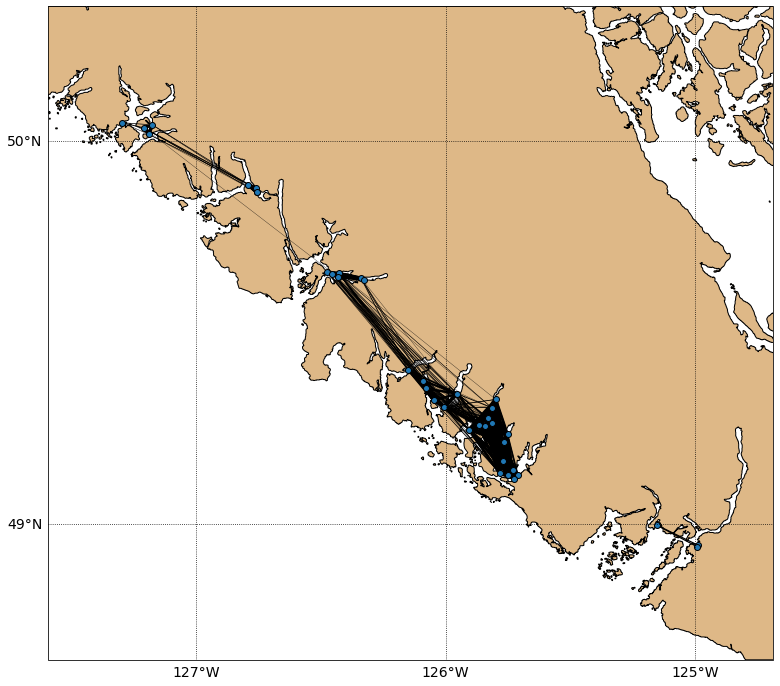

In [63]:
# Increase font size
plt.rcParams['font.size'] = 14

# Make plot area
xlim, ylim = [min(w['lon'])-0.3, max(w['lon'])+0.3], [min(w['lat'])-0.3, max(w['lat'])+0.3]
fig, ax = plt.subplots(figsize=(13, 13), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'),zorder=0)

xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False


scatter = ax.scatter(d['lon'], d['lat'], marker='o',edgecolors = 'k',transform=crs.PlateCarree(), zorder=2)

for i in range(38):
    for j in range(38):
        station_origin = e['Ref'][(e['Day']==14)].values[i]
        station_destination = e['Ref'][(e['Day']==14)].values[j]
        lon_origin = w['lon'][w['Ref']==station_origin]
        lon_dest = w['lon'][w['Ref']==station_destination]
        lat_origin = w['lat'][w['Ref']==station_origin]
        lat_dest = w['lat'][w['Ref']==station_destination]
        if part[i,j] > 0:
            p = math.log10(part[i,j])
        else:
            p = 0
        
        plt.plot([lon_origin, lon_dest], [lat_origin, lat_dest],
                  linewidth=(p),
                  color='k',
                  zorder = 1,
                  transform=crs.PlateCarree())

# Create a visualization that allows you to identify “compartments” that could be a basis of area-based management of finfish farms in BC.

In [24]:
xlim1, ylim1 = [min(w['lon'])-0.2, -127], [49.9, 50.2]
xlim2, ylim2 = [-127, -126.7], [49.8, 50]
xlim3, ylim3 = [-126.7, -126.2], [49.5, 49.8]
xlim4, ylim4 = [-126.3, -125.5], [49, 49.55]
xlim5, ylim5 = [-125.3, -124.9], [48.85, 49.1]

In [25]:
def q5(xlim, ylim, color):
    # Increase font size
    plt.rcParams['font.size'] = 14

    # Make plot area
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
    ax.set_extent(xlim + ylim)

    # Draw coastline
    ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'),zorder=0)

    # xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
    gl = ax.gridlines(linestyle=":", color='k', draw_labels=True) #xlocs=xlocs, ylocs=ylocs)
    gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    gl.xlabels_top, gl.ylabels_right = False, False


    for i in range(38):
        for j in range(38):
            station_origin = e['Ref'][(e['Day']==14)].values[i]
            station_destination = e['Ref'][(e['Day']==14)].values[j]
            lon_origin = w['lon'][w['Ref']==station_origin].values
            lon_dest = w['lon'][w['Ref']==station_destination].values
            lat_origin = w['lat'][w['Ref']==station_origin].values
            lat_dest = w['lat'][w['Ref']==station_destination].values
            
            if lon_dest>xlim[0] and lon_dest<xlim[1]:

                if part[i,j] > 0:
                    p = math.log10(part[i,j])*2
                else:
                     p = 0

                if (lon_origin>xlim1[0] and lon_origin<xlim1[1]):
                    c = 'b'
                if (lon_origin>xlim2[0] and lon_origin<xlim2[1]):
                    c = 'r'
                if (lon_origin>xlim3[0] and lon_origin<xlim3[1]):
                    c = 'limegreen'
                if (lon_origin>xlim4[0] and lon_origin<xlim4[1]):
                    c = 'magenta'
                if (lon_origin>xlim5[0] and lon_origin<xlim5[1]):
                    c='c'

                plt.plot([lon_origin, lon_dest], [lat_origin, lat_dest],
                              linewidth=(p),
                              color=c,
                              zorder = 1,
                              transform=crs.PlateCarree())

    scatter = ax.scatter(d['lon'], d['lat'], marker='o',facecolor = color, edgecolors = 'k',transform=crs.PlateCarree(), zorder=2, label='Group 1')

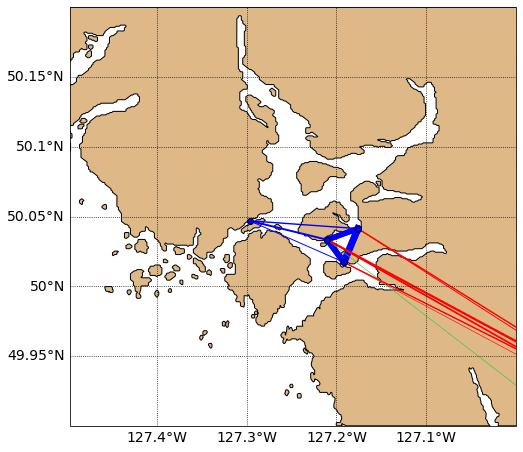

In [26]:
q5(xlim1, ylim1, 'b')

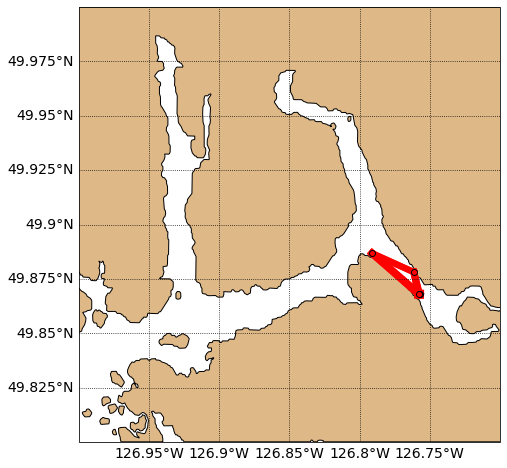

In [27]:
q5(xlim2, ylim2, 'r')

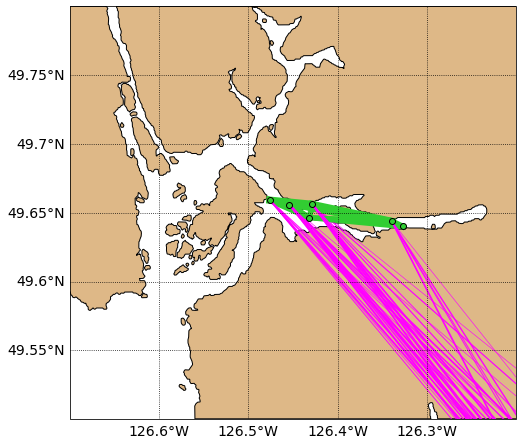

In [28]:
q5_2(xlim3, ylim3, 'limegreen')

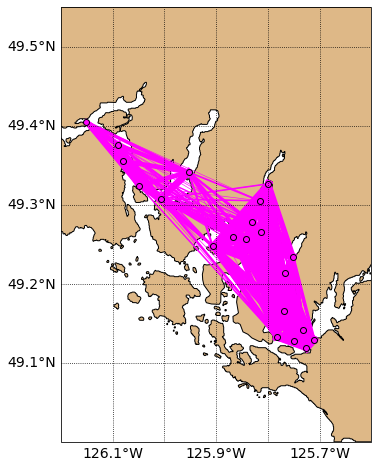

In [30]:
q5_2(xlim4, ylim4, 'magenta')

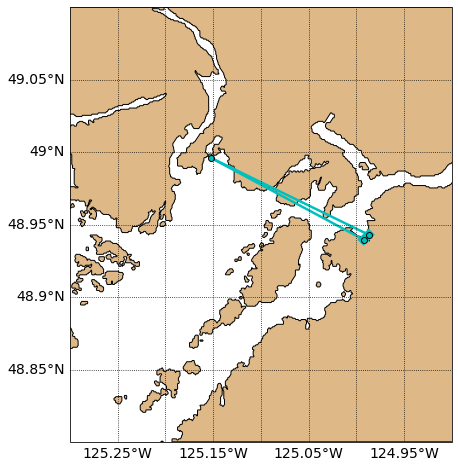

In [31]:
q5_2(xlim5, ylim5, 'c')